<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2025-2/Laboratorios/Laboratorio_05_ABC_Modelo_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Problema:

El dataset de casas de California. Es un conjunto de datos que contiene información sobre los precios medios de las viviendas y otras características de los distritos de California, basado en el censo de 1990.



**longitude**: es la longitud del centroide del distrito, expresada en grados. Esta variable indica la posición geográfica del distrito en el mapa.

**latitude**: es la latitud del centroide del distrito, expresada en grados. Esta variable también indica la posición geográfica del distrito en el mapa.

**housing_median_age**: es la edad media de las casas en el distrito, expresada en años. Esta variable refleja el estado y la antigüedad de las viviendas en el distrito.

**total_rooms**: es el número total de habitaciones en el distrito, sin distinguir entre tipos de habitaciones. Esta variable refleja el tamaño y la capacidad de las viviendas en el distrito.

**total_bedrooms**: es el número total de dormitorios en el distrito. Esta variable refleja el número de espacios destinados al descanso en las viviendas del distrito.

**population**: es el número de personas que viven en el distrito. Esta variable refleja la densidad y la demanda de vivienda en el distrito.


**households**: es el número de hogares en el distrito. Un hogar es un grupo de personas que residen dentro de una casa. Esta variable refleja la estructura y la composición de las familias en el distrito.


**median_income**: es el ingreso medio por hogar en el distrito, expresado en miles de dólares ($1000). Esta variable refleja el nivel socioeconómico y el poder adquisitivo de los habitantes del distrito.


**median_house_value**: es el valor medio de las casas en el distrito, expresado en cientos de miles de dólares ($100,000). Esta variable es la variable objetivo que se quiere predecir. Refleja el precio y la calidad de las viviendas en el distrito.


# 1.0 Análisis del data frame

1. Leer el data frame en formato csv en la dirección https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Sesion_07_housing.csv

2. Entender  el estado de los datos, para ello puedo emplear los comandos básicos del pandas

  ```python
  df.info()
  df.describe()
  df.isnull().sum()
  df.isna().sum()
```
Estos dos últimos son equivalentes.

3. Determinar los elementos únicos dentro de la columna ocean_proximity.


4. Para las columnas

```python
cols = ["housing_median_age",	"total_rooms",	"total_bedrooms",	"population",	"households",	"median_income",	"median_house_value"]
```

Determinar el promedio de cada una de las columnas asociado a cada elementos unico de ocean_proximity, intenta con la operación groupby.


5. Construye un histograma para cada columna, puede emplear la libreria de seaborn.

### [Diagrama de caja](https://en.wikipedia.org/wiki/Box_plot)


### Diagrama de caja

![box](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/800px-Boxplot_vs_PDF.svg.png)



### Interpretación de un diagrama de caja

- Desde el minimo al valor más bajo de la caja: primer cuartil, 25% de los datos
- Desde el valor más bajo de la caja hasta la mediana: segundo cuartil, 25% de los datos
- Desde la mediana hasta el valor mas alto de la caja : tercer cuartil, 25% de los datos
- Desde el valor mas alto de la caja hasta el máximo: Cuarto  cuartil, 25% de los datos


El rango intercuartil $IQR = Q_3-Q_1$ permite definir que datos pueden ser atípicos, basado en los siguientes limites:

$Max = Q3 + 1.5IQR$

$Min = Q1 - 1.5IQR$



El cuartil puede ser determinado como sigue:

Para calcular los cuartiles de una lista de números:

- Ordenar los números de menor a mayor.
- Calcular la posición de cada cuartil usando la fórmula: Q = a (N+1) / 4, donde Q es la posición del cuartil, a es el número del cuartil (1, 2 o 3), y N es el número total de datos.
- Si la posición del cuartil es un número entero, el valor del cuartil es el dato que está en esa posición.
- Si la posición del cuartil es un número decimal, el valor del cuartil se interpola usando la fórmula: Q = x + d (y - x), donde Q es el valor del cuartil, x es el dato anterior a la posición del cuartil, y es el dato posterior a la posición del cuartil, y d es la parte decimal de la posición del cuartil.


Veamos un ejemplo:



In [10]:
T = np.array([52, 57, 57, 58, 63, 66, 66, 67, 67, 68, 69, 70, 70, 70, 70, 72, 73, 75, 75, 76, 76, 78, 79, 89])
Tsort = np.sort(T)
print(len(T))
print(f"T sort:{Tsort}")
len(T)/4

24
T sort:[52 57 57 58 63 66 66 67 67 68 69 70 70 70 70 72 73 75 75 76 76 78 79 89]


6.0

88.5
52.5


{'whiskers': [<matplotlib.lines.Line2D at 0x7d4223eee7b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7d4223eeecf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d4223e71c40>],
 'medians': [<matplotlib.lines.Line2D at 0x7d4223eef8f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d4223eefc20>],
 'means': []}

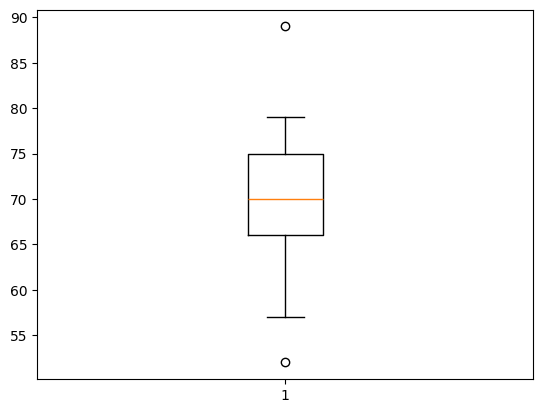

In [11]:

IQR=9
max_ = 75 + 1.5*IQR
min_ = 66 - 1.5*IQR
print(max_)
print(min_)
plt.boxplot(T)

7. Empleando el siguiente código realiza el gráfico boxplot,
```python
#draw boxplot
df.boxplot(column="median_house_value", by='ocean_proximity', sym = 'k.', figsize=(18,6))
#set title
plt.title('Boxplot for comparing price per living space for each city')
plt.show()
```

8. Determina la matrix de correlación.

### [Matrix de correlación](https://en.wikipedia.org/wiki/Correlation)

¿Como se determina la matrix de correlación?

![Matrix de correlación](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/1920px-Correlation_examples2.svg.png)



```python
corr_matrix = df.corr()
corr_matrix

plt.figure(figsize = (10,6))
sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm", center=0)
plt.show()
```

9. con las columnas, realiza un grafico pairplot empleando seaborn  de python.
```python
cols = ["median_house_value", "median_income", "total_rooms","housing_median_age"]
```

10. Realizaun scatter plot con la libreria sea born de python, el color del grafico puede ser empleado con la columna median_house_value

## Evitar el data *Snooping bias*.

En algunos casos se sugiere dividir los datos en entrenamiento y test desde el principio dado que el cerebro puede sobreajustar el dataset y los resultados no significativos se pueden volver significativos. El procedimiento correcto es probar cualquier hipótesis en un conjunto de datos que no se utilizó para generar las hipótesis inicial.


## *Sampling bias*

Si el dataset es lo suficientemente grande un muestreo aleatorio de la muestra puede ser considerado, sin embargo si la muestra es pequena se debe garantizar homegeniedad en el dataset de entrenamiento.


Ejemplo:

Por ejemplo, la población de EE. UU. esta compuesto por un 51,3 % de mujeres y un 48,7 % de hombres, por lo que una encuesta bien realizada en EEUU
trata de mantener esta proporción en la muestra: 513 mujeres y 487 hombres. Esto se llama muestreo estratificado(stratified sampling): la población se divide en subgrupos homogéneos llamados estratos(strata), y se muestrea el número correcto de instancias de cada estrato para garantizar que el
El conjunto de prueba es representativo de la población general. Si usaran muestras puramente aleatorias, habría alrededor del 12% de posibilidades de muestrear un conjunto de prueba sesgado con menos del 49% de mujeres o más del 54% de mujeres. De cualquier manera, los resultados de la encuesta serían
significativamente sesgada.


11. ¿Las siguiente linea es adecuada para separar el dataframe en datos de entrenamiento de test?, ¿que pasa en la división de los datos?


```python
from sklearn.model_selection import train_test_split

# ¿Es significativa la muestra que se esta considerando?
train_set, test_set \
  = train_test_split(df, test_size = 0.2, random_state = 42)

print(len(train_set))
print(len(test_set))

```


12. División del dataset en grupos:


La siguiente división puede ser realizada  basada en la experticie de lo que se esta analizando, y sobre ello se debe tomar una muestra significativa. Una posible solución al problema puede ser el siguiente:

```python
df["income_cat"] = pd.cut(df["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])


df.income_cat.hist()


```

La forma automatica de realizar la división puede ser la siguiente:

```python
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["income_cat"]):
  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc[test_index]

```


Analiza las siguiente lineas de código y saca conclusiones referente a las proporciones del dataset.

```python
df["income_cat"].value_counts() / len(df)

strat_train_set["income_cat"].value_counts() / len(strat_train_set)

strat_test_set["income_cat"].value_counts() / len(strat_test_set)


train_set, test_set \
  = train_test_split(df, test_size = 0.2, random_state = 7)

train_set["income_cat"].value_counts() / len(train_set)
```

un comparativo general puede ser estructurado de la siguente forma, analiza  los errores:

```python
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(df),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] =abs( 100 * compare_props["Random"] / compare_props["Overall"] - 100)
compare_props["Strat. %error"] =abs( 100 * compare_props["Stratified"] / compare_props["Overall"] - 100)
```

13. Puedes agregar nuevas variables al dataframe para el análisis, por ejemplo:
```python
df_train["rooms_per_household"] = df_train["total_rooms"]/df_train["households"]
df_train["bedrooms_per_room"] = df_train["total_bedrooms"]/df_train["total_rooms"]
df_train["population_per_household"]=df_train["population"]/df_train["households"]
```




# Limpieza de datos

Lo que sigue son códigos que pueden servir para limpiar los datos.

```python

df.isnull().sum()


#df_train.dropna(subset=["total_bedrooms"]) #Eliminar los nan
#df_train.drop("total_bedrooms", axis=1)  # Eliminar la columna
median = df_train["total_bedrooms"].median()
q=df_train["total_bedrooms"].fillna(median).copy()


q=pd.DataFrame(q)

q.isnull().sum()

```

##imputer

Forma automática para tratar los datos (Asegurate de trabajar con las columnas numéricas):


```python
from sklearn.impute import SimpleImputer
#imputer = Imputer(strategy="median")

df_train_num = df_train.drop("ocean_proximity", axis=1)

imp_mean = SimpleImputer( strategy='mean')

imp_mean.fit(df_train_num)

imp_mean.statistics_
```

14. Compara las siguientes variables:
```python
imp_mean.statistics_
df_train_num.median()
```


```python
Constuye la matriz de características:

X = imp_mean.transform(df)
housing_tr = pd.DataFrame(X, columns=df_train_num.columns)
```


# Manejo de texto y atributos categóricos
15.  ¿Qué realizan las siguientes lineas de código?

```
from sklearn.preprocessing import OneHotEncoder
df_train["ocean_proximity"].unique()
housing_cat=df_train[["ocean_proximity"]]
housing_cat

cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
print(housing_cat_1hot)
print(cat_encoder.categories_)


df_cat_1hot = pd.DataFrame(housing_cat_1hot, columns = cat_encoder.categories_[0])

housing_tr_ = housing_tr.join(df_cat_1hot)
```


# Escalamiento de variables

16. Las variables pueden ser escaladas como sigue:

```python

cols=["longitude", "latitude",	"housing_median_age",	"total_rooms",\
      "total_bedrooms",	"population",	"households",	"median_income",\
      "<1H OCEAN",	"INLAND",	"ISLAND",	"NEAR BAY", "NEAR OCEAN"]


housing_scale=housing_tr_[cols]
housing_scale


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(housing_scale)

X = scaler.transform(housing_scale)


housing_prepared = pd.DataFrame(X, columns = housing_scale.columns)

```


17. Para todos los pasos anteriores, contruye ordenadamente los pasos limpieza, escalamiento de variables, manejo de texto y atributos categóricos para tener el data frame listo para el análisis. Recuerda dividir el data frame en datos de entrenamiento y de test con la correcta estractificación. Genera dos data frame: housing_train, housing_test, cada una, debe tener las caracteristicas y los datos etiquetados.

1. ¿que puede concluir respecto al modelo empleado?
2. ¿El modelo de regresión lineal es valido para lo construido,
3. ¿qué informacion nos da el score?
4. ¿Puede ser ajustado a otro modelo?
5. ¿Como puede autmatizar todo el proceso empleando pipelines?






# Desarrollo 1.0

In [12]:
# 1. Lectura del dataframe
df = pd.read_csv("https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Sesion_07_housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [13]:
# 2. Descripción de los datos

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [14]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [15]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


Observamos que hay algunos de los "hogares" no cuentan con habitaciones (bedrooms), podemos suponer que se tratan de locales comerciales.

In [16]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [17]:
# 3. Determinar los elementos únicos dentro de la columna ocean_proximity.
df["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [18]:
# 4. Para las columnas Determinar el promedio de cada una de las
# columnas asociado a cada elementos unico de ocean_proximity, intenta con la operación groupby.

cols = ["housing_median_age",   "total_rooms",  "total_bedrooms",   "population",   "households",   "median_income",    "median_house_value"]
df.groupby("ocean_proximity")[cols].mean()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
ocean_proximity,,,,,,,
<1H OCEAN,29.277397,2627.233451,546.539185,1518.440447,517.419083,4.231101,240267.990812
INLAND,24.262623,2721.252925,533.881619,1392.411484,478.006927,3.210359,124896.863147
ISLAND,42.400000,1574.600000,420.400000,668.000000,276.600000,2.744420,380440.000000
NEAR BAY,37.756388,2490.335242,514.182819,1227.881057,487.236123,4.175647,259279.292070
NEAR OCEAN,29.314688,2587.165525,538.615677,1355.637367,501.528919,4.006374,249042.355023


In [19]:
cols

['housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

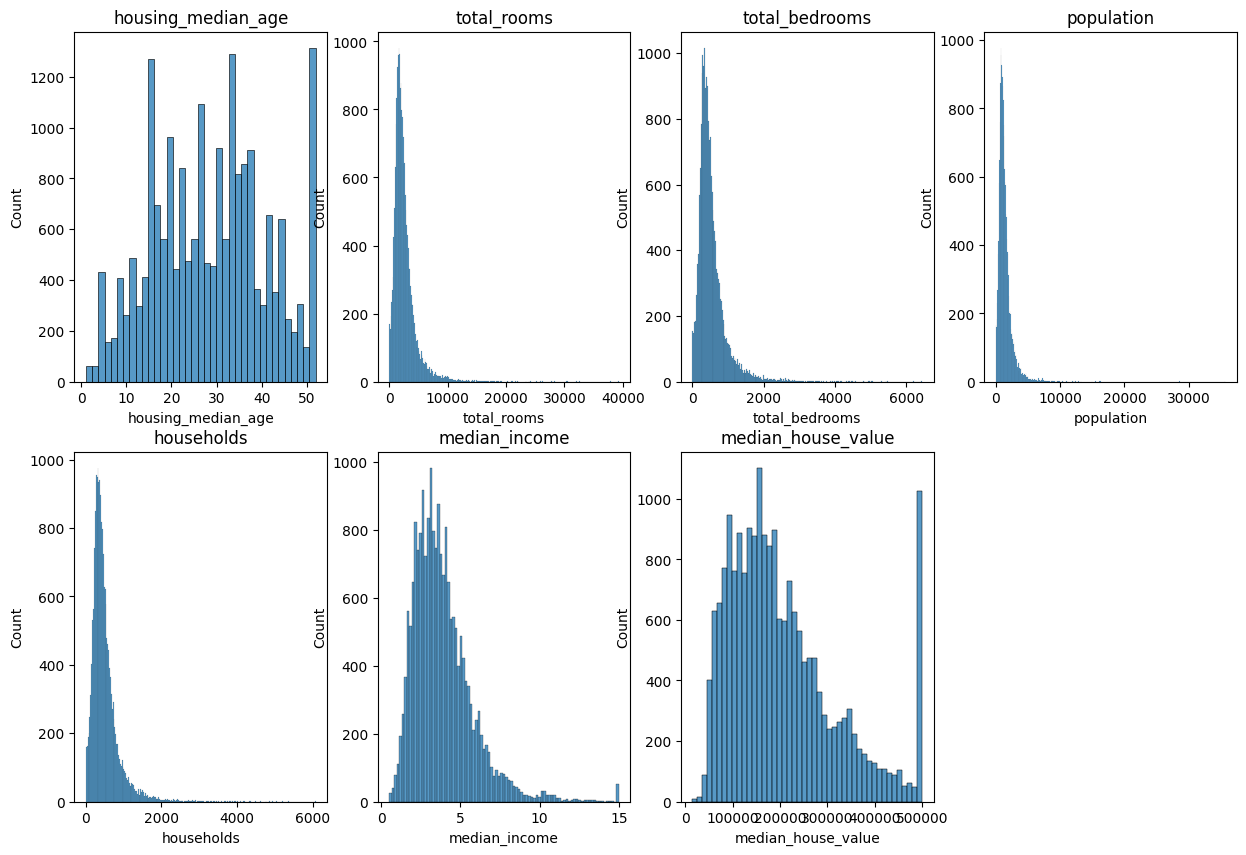

In [20]:
# 5. Construye un histograma para cada columna, puede emplear la libreria de seaborn.

plt.figure(figsize=(15,10))

for col in cols:
  plt.subplot(2,4,cols.index(col)+1)
  sns.histplot(df[col])
  plt.title(f"{col}")

plt.show()

In [21]:
# 6. Determinar los cuartiles de "median_house_value" por "ocean_proximity"
quartiles = df.groupby('ocean_proximity')['median_house_value'].quantile([0.25, 0.5, 0.75])
print(quartiles)

ocean_proximity      
<1H OCEAN        0.25    164300.0
                 0.50    215000.0
                 0.75    289475.0
INLAND           0.25     77600.0
                 0.50    108700.0
                 0.75    149000.0
ISLAND           0.25    300000.0
                 0.50    414700.0
                 0.75    450000.0
NEAR BAY         0.25    162500.0
                 0.50    233800.0
                 0.75    346000.0
NEAR OCEAN       0.25    150000.0
                 0.50    228750.0
                 0.75    322525.0
Name: median_house_value, dtype: float64


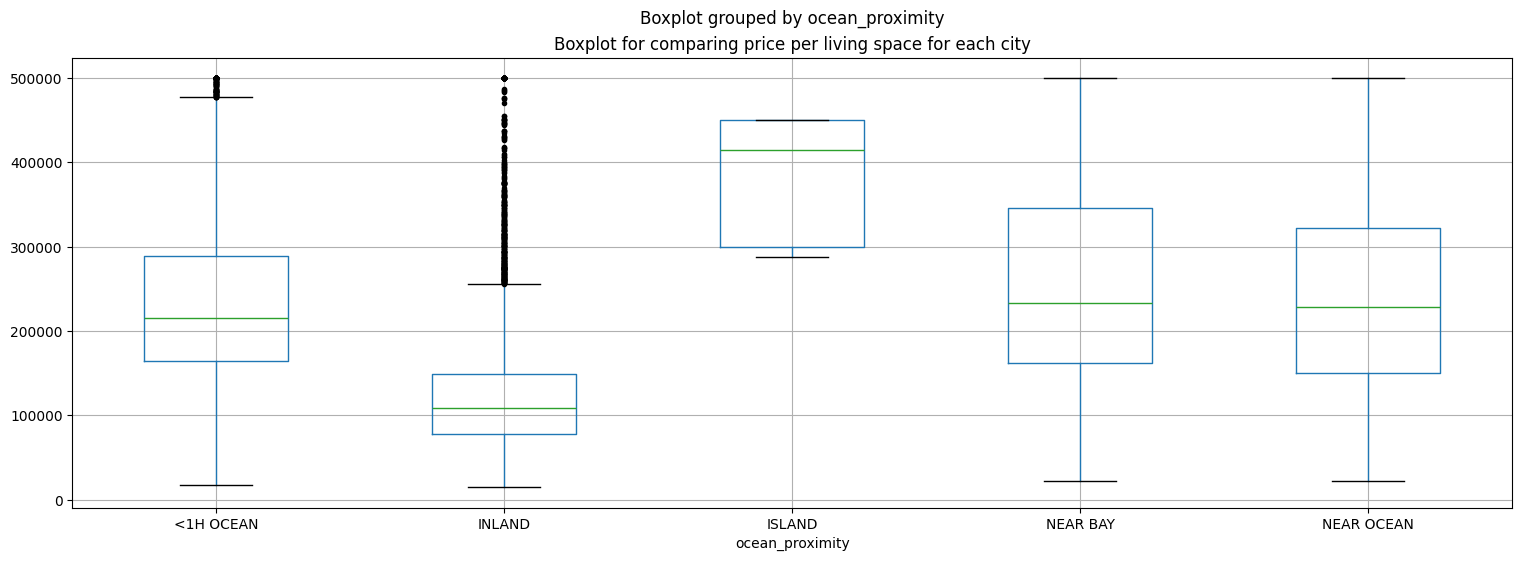

In [22]:
# 7. Box plot del valor medio de las casas clasficados por su proximidad al oceano

#draw boxplot
df.boxplot(column="median_house_value", by='ocean_proximity', sym = 'k.', figsize=(18,6))
#set title
plt.title('Boxplot for comparing price per living space for each city')
plt.show()

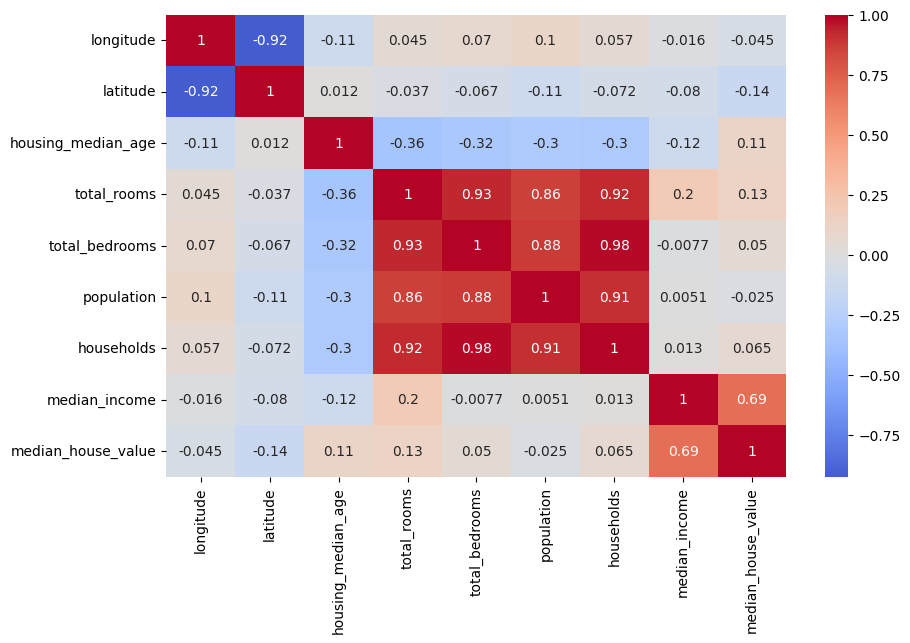

In [23]:
corr_matrix = df.drop("ocean_proximity", axis=1).corr()
corr_matrix

plt.figure(figsize = (10,6))
sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm", center=0)
plt.show()

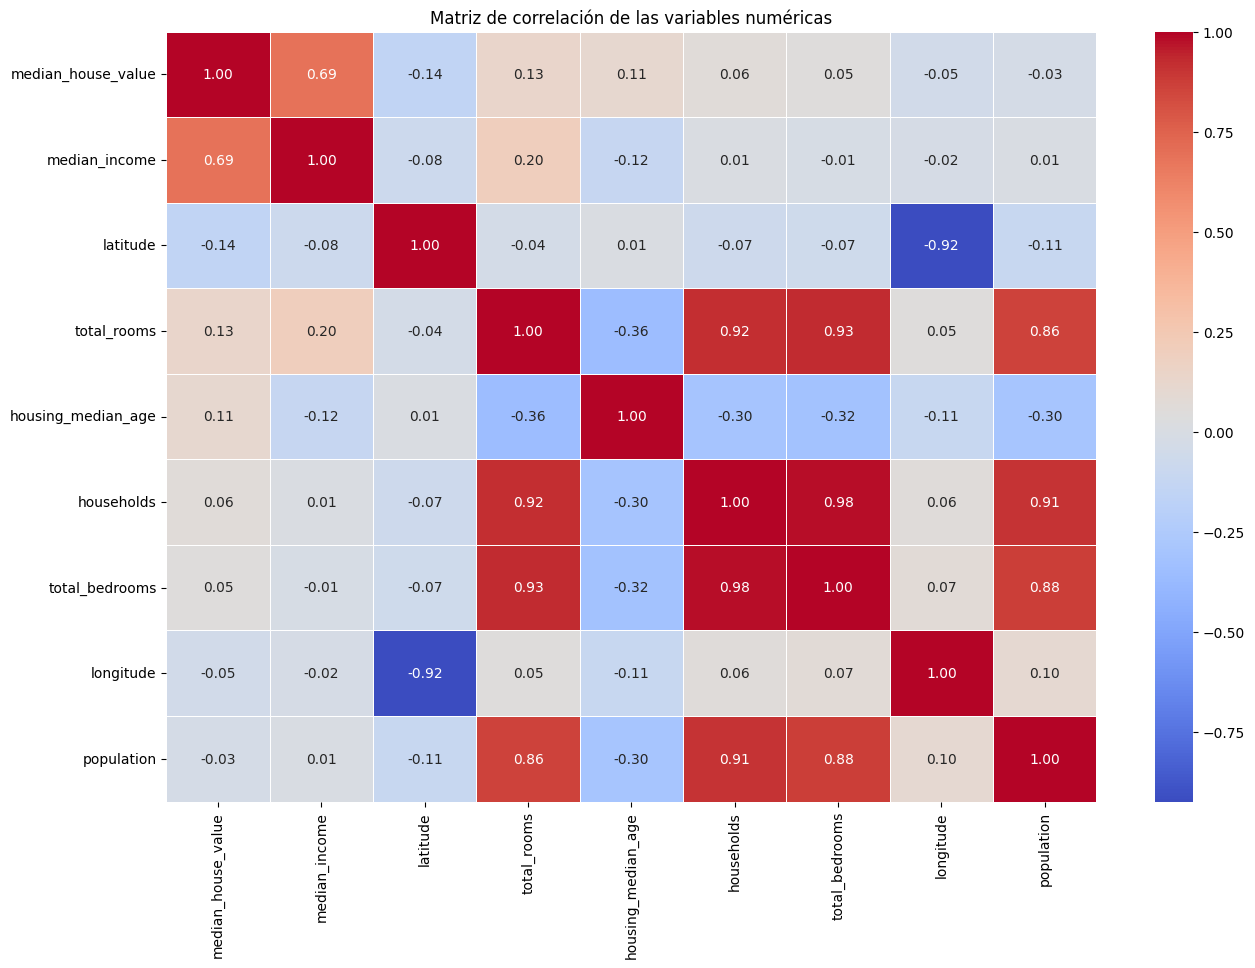

In [24]:
# Ordenar la matriz de correlación según la correlación absoluta con median_house_value
corr_with_diag = corr_matrix["median_house_value"].abs().sort_values(ascending=False)
ordered_cols = corr_with_diag.index.tolist()
corr_matrix = corr_matrix.loc[ordered_cols, ordered_cols]

plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de correlación de las variables numéricas")
plt.show()

In [25]:
# Sort the correlation matrix by the absolute correlation with median_house_value
sorted_corr = corr_matrix["median_house_value"].sort_values(ascending=False)
print(sorted_corr)

median_house_value    1.000000
median_income         0.688355
total_rooms           0.133294
housing_median_age    0.106432
households            0.064894
total_bedrooms        0.049686
population           -0.025300
longitude            -0.045398
latitude             -0.144638
Name: median_house_value, dtype: float64


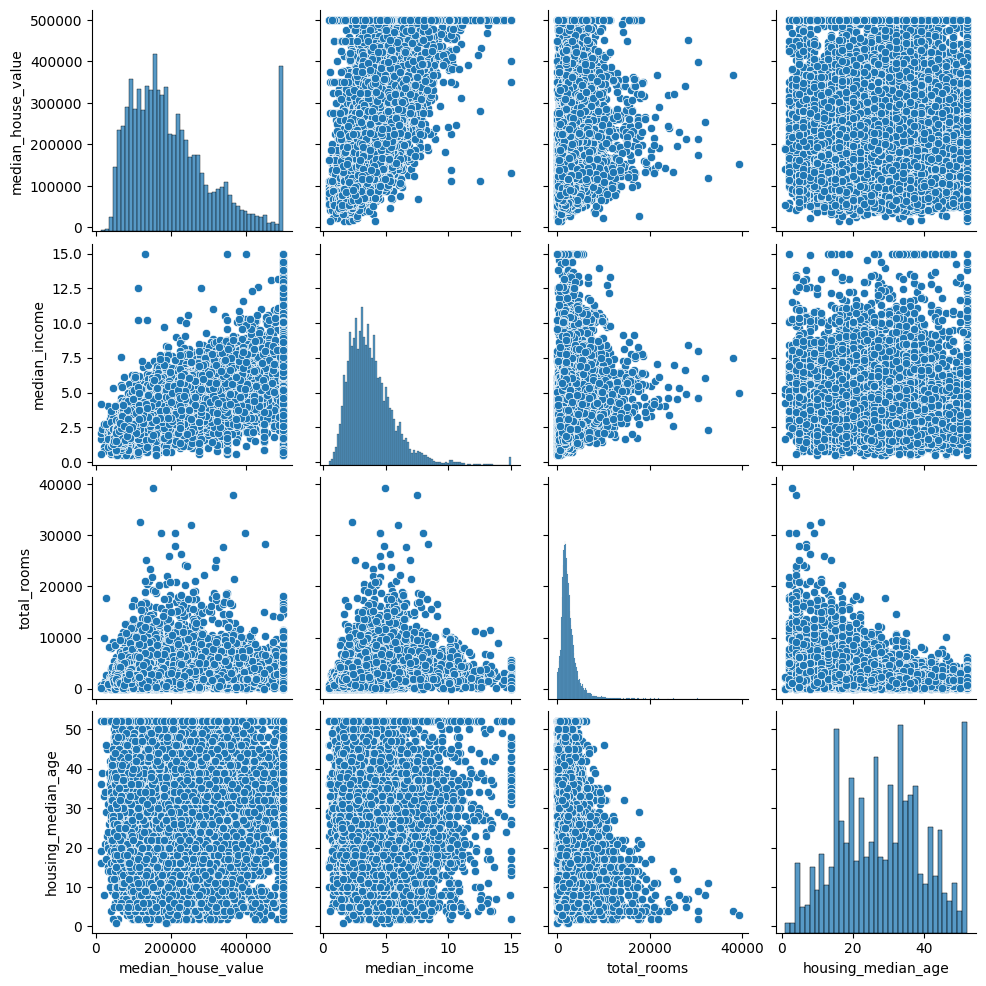

In [26]:
# 9. con las columnas, realiza un grafico pairplot empleando seaborn  de python.

cols = ["median_house_value", "median_income", "total_rooms","housing_median_age"]

sns.pairplot(df[cols])
plt.show()


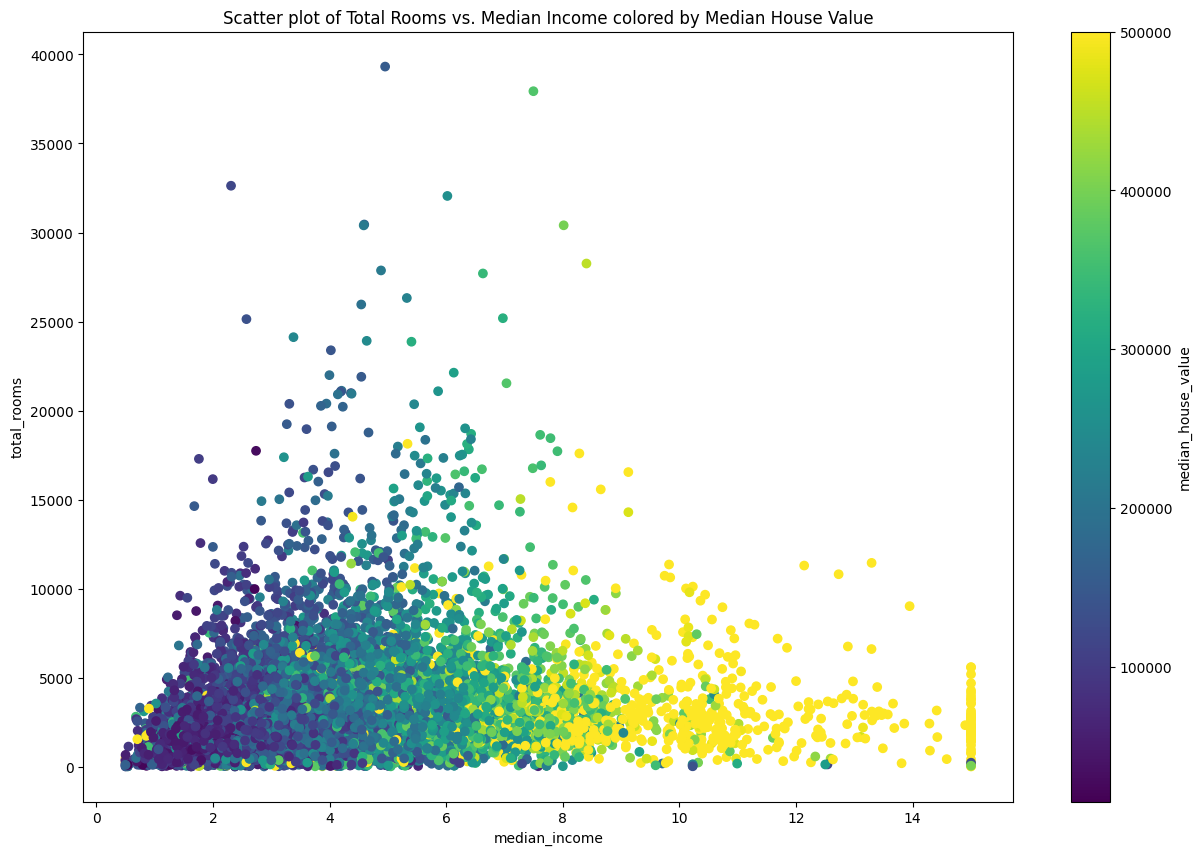

In [27]:
# 10. Realiza un scatter plot con la libreria sea born de python, el color del grafico puede ser empleado con la columna median_house_value

plt.figure(figsize=(15, 10))
plt.scatter(x=df["median_income"], y=df["total_rooms"], c=df["median_house_value"], cmap="viridis")
plt.xlabel("median_income")
plt.ylabel("total_rooms")
plt.title("Scatter plot of Total Rooms vs. Median Income colored by Median House Value")
plt.colorbar(label="median_house_value")
plt.show()

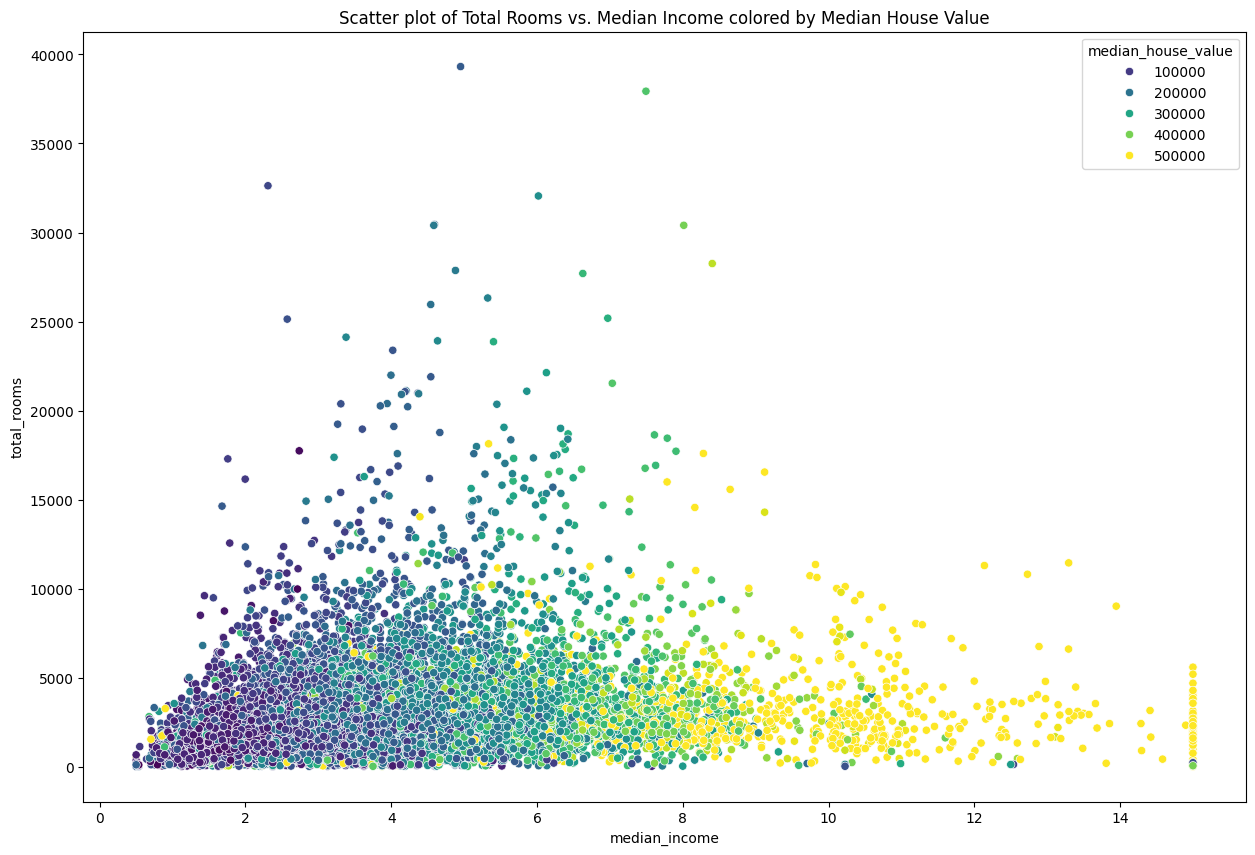

In [28]:
plt.figure(figsize=(15, 10))
sns.scatterplot(
    data=df,
    x="median_income",
    y="total_rooms",
    hue="median_house_value",
    palette="viridis"
)
plt.xlabel("median_income")
plt.ylabel("total_rooms")
plt.title("Scatter plot of Total Rooms vs. Median Income colored by Median House Value")
plt.show()

In [29]:
# 9. con las columnas, realiza un grafico pairplot empleando seaborn  de python.

# cols = ["median_house_value", "median_income", "total_rooms","housing_median_age"]

# sns.pairplot(df[cols],hue="median_house_value",palette="viridis")
# plt.show()

#2.0 Preparacion del data frame

### Desarollo 2.0

In [30]:
#11. ¿Las siguiente linea es adecuada para separar el dataframe en datos de entrenamiento de test?, ¿que pasa en la división de los datos?

from sklearn.model_selection import train_test_split

# ¿Es significativa la muestra que se esta considerando?
train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)

print(len(train_set))
print(len(test_set))


16346
4087


El código implementado corresponde a una división aleatoria de nuestro dataset, en este caso el 20% de los datos son seleccionados para el "test_set", se define un "random_state" el cual nos garantiza reproducibilidad (Este valor es como la semilla que se emplean en el modulo random).

Respecto a si es la manera más adecuada, ciertamente no lo es, esto dado que nuestro objetivo final es realizar predicciónes sobre el "median_house_value" el cual notamos que no sigue una distribución uniforme, este posee una densidad algo parecida a la distribución $χ$, por lo que una elección aleatoria de los datos de entrenamiento y prueba puede introducir un sesgo, de todas formas, dado nuestro desconocimiento en la distribución del "median_house_value", una split uniforme y aleatorio puede ser un buen primer acercamiento.    

<Axes: >

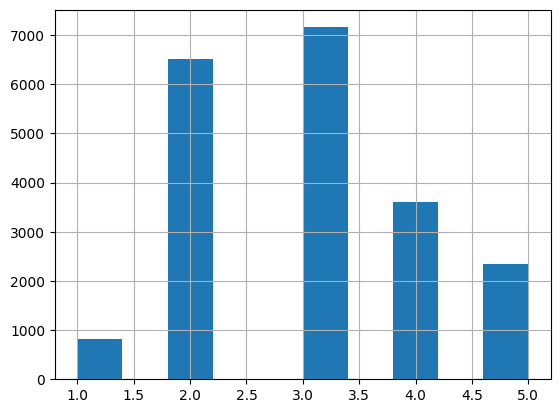

In [31]:
# 12.
df["income_cat"] = pd.cut(df["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])


df.income_cat.hist()

In [32]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["income_cat"]):
  print(train_index)
  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc[test_index]


[17880 17389 19010 ...  7272 11763  9789]


In [33]:
# Analiza las siguiente lineas de código y saca conclusiones referente a las proporciones del dataset.

df["income_cat"].value_counts() / len(df)

strat_train_set["income_cat"].value_counts() / len(strat_train_set)

strat_test_set["income_cat"].value_counts() / len(strat_test_set)


train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 7)

A = train_set["income_cat"].value_counts() / len(train_set)
print(A.sum())
A

1.0


,count
income_cat,
3,0.352747
2,0.319161
4,0.175639
5,0.112138
1,0.040316


Ahora se nota que tanto el train_set como el test_set poseen las mismas proporiciones en la categorias de income_cat, de modo que ahora ambos conjuntos representan de buena manera al grupo completo de datos

In [34]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(df),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()

compare_props["Rand. %error"] =abs( 100 * compare_props["Random"] / compare_props["Overall"] - 100)
compare_props["Strat. %error"] =abs( 100 * compare_props["Stratified"] / compare_props["Overall"] - 100)

compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
income_cat,,,,,
1,0.039838,0.039883,0.038904,2.343711,0.113051
2,0.318847,0.318816,0.317348,0.470218,0.009787
3,0.350218,0.350135,0.354783,1.303667,0.023760
4,0.176724,0.176658,0.173232,1.975809,0.037478
5,0.114374,0.114509,0.115733,1.188213,0.118570


Note que en el caso de una separación aleatoria de los datots (como se observa en la columna Rand. %error) se presentan algunas desviaciones (errores) respecto al valor idoneo de la distribución de los datos (Este valor idone se ve en la columna Overall). El Strat. %erros es $\leq 0.1%$ para todas las categorias, así la separación Strat. nos da una mejor representación de la población.

In [35]:
# 13. Puedes agregar nuevas variables al dataframe para el análisis, por ejemplo:

df_train = strat_train_set


df_train["rooms_per_household"] = df_train["total_rooms"]/df_train["households"]
df_train["bedrooms_per_room"] = df_train["total_bedrooms"]/df_train["total_rooms"]
df_train["population_per_household"]=df_train["population"]/df_train["households"]

df_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room,population_per_household
17880,-121.98,37.25,19.0,755.0,93.0,267.0,99.0,15.0000,500001.0,<1H OCEAN,5,7.626263,0.123179,2.696970
17389,-121.87,37.33,37.0,3137.0,685.0,2048.0,651.0,3.0156,270300.0,<1H OCEAN,3,4.818740,0.218361,3.145929
19010,-122.68,38.44,36.0,1311.0,259.0,648.0,268.0,3.4545,161200.0,<1H OCEAN,3,4.891791,0.197559,2.417910
17641,-121.87,37.41,17.0,3719.0,588.0,2089.0,561.0,6.7867,273700.0,<1H OCEAN,5,6.629234,0.158107,3.723708
10162,-117.85,33.90,25.0,1548.0,256.0,811.0,263.0,5.2037,242200.0,<1H OCEAN,4,5.885932,0.165375,3.083650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17250,-120.46,34.65,22.0,1298.0,358.0,1272.0,363.0,1.6488,117500.0,NEAR OCEAN,2,3.575758,0.275809,3.504132
2123,-119.73,36.80,24.0,1316.0,249.0,781.0,260.0,3.7578,69200.0,INLAND,3,5.061538,0.189210,3.003846
7272,-118.15,33.96,33.0,1471.0,451.0,2272.0,482.0,2.5385,160900.0,<1H OCEAN,2,3.051867,0.306594,4.713693
11763,-117.39,33.98,37.0,2337.0,452.0,948.0,437.0,3.1450,169100.0,INLAND,3,5.347826,0.193410,2.169336



### imputer

Forma automática para tratar los datos (Asegurate de trabajar con las columnas numéricas):

In [36]:
from sklearn.impute import SimpleImputer
#imputer = Imputer(strategy="median")

df_train_num = df_train.drop("ocean_proximity", axis=1)

imp_mean = SimpleImputer( strategy='mean')

imp_mean.fit(df_train_num)

imp_mean.statistics_

array([-1.19575240e+02,  3.56390609e+01,  2.86794935e+01,  2.64349168e+03,
        5.39510645e+02,  1.42772911e+03,  5.01013642e+02,  3.87020800e+00,
        2.07079816e+05,  3.00691301e+00,  5.43394299e+00,  2.12976050e-01,
        3.06517452e+00])

In [37]:
df_train_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat,rooms_per_household,bedrooms_per_room,population_per_household
17880,-121.98,37.25,19.0,755.0,93.0,267.0,99.0,15.0000,500001.0,5,7.626263,0.123179,2.696970
17389,-121.87,37.33,37.0,3137.0,685.0,2048.0,651.0,3.0156,270300.0,3,4.818740,0.218361,3.145929
19010,-122.68,38.44,36.0,1311.0,259.0,648.0,268.0,3.4545,161200.0,3,4.891791,0.197559,2.417910
17641,-121.87,37.41,17.0,3719.0,588.0,2089.0,561.0,6.7867,273700.0,5,6.629234,0.158107,3.723708
10162,-117.85,33.90,25.0,1548.0,256.0,811.0,263.0,5.2037,242200.0,4,5.885932,0.165375,3.083650
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17250,-120.46,34.65,22.0,1298.0,358.0,1272.0,363.0,1.6488,117500.0,2,3.575758,0.275809,3.504132
2123,-119.73,36.80,24.0,1316.0,249.0,781.0,260.0,3.7578,69200.0,3,5.061538,0.189210,3.003846
7272,-118.15,33.96,33.0,1471.0,451.0,2272.0,482.0,2.5385,160900.0,2,3.051867,0.306594,4.713693
11763,-117.39,33.98,37.0,2337.0,452.0,948.0,437.0,3.1450,169100.0,3,5.347826,0.193410,2.169336


In [38]:
#14. Compara las siguientes variables:
print("Imputer statistics (mean):")
print(imp_mean.statistics_)

print("\nMedian of numerical columns in df_train_num:")
print(df_train_num.drop("income_cat", axis=1).median())

Imputer statistics (mean):
[-1.19575240e+02  3.56390609e+01  2.86794935e+01  2.64349168e+03
  5.39510645e+02  1.42772911e+03  5.01013642e+02  3.87020800e+00
  2.07079816e+05  3.00691301e+00  5.43394299e+00  2.12976050e-01
  3.06517452e+00]

Median of numerical columns in df_train_num:
longitude                     -118.510000
latitude                        34.260000
housing_median_age              29.000000
total_rooms                   2131.000000
total_bedrooms                 435.000000
population                    1168.000000
households                     410.000000
median_income                    3.529900
median_house_value          179900.000000
rooms_per_household              5.226415
bedrooms_per_room                0.203339
population_per_household         2.814815
dtype: float64


Los valores del imputer statistics son muy parecidos a los obtenidos por el metodo median al aplicarselo al dataframe, idealmente deberian ser iguales, no se que podria estar ocurriendo

In [39]:
#Constuye la matriz de características:

X = imp_mean.transform(df_train_num)
housing_tr = pd.DataFrame(X, columns=df_train_num.columns)

In [40]:
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat,rooms_per_household,bedrooms_per_room,population_per_household
0,-121.98,37.25,19.0,755.0,93.0,267.0,99.0,15.0000,500001.0,5.0,7.626263,0.123179,2.696970
1,-121.87,37.33,37.0,3137.0,685.0,2048.0,651.0,3.0156,270300.0,3.0,4.818740,0.218361,3.145929
2,-122.68,38.44,36.0,1311.0,259.0,648.0,268.0,3.4545,161200.0,3.0,4.891791,0.197559,2.417910
3,-121.87,37.41,17.0,3719.0,588.0,2089.0,561.0,6.7867,273700.0,5.0,6.629234,0.158107,3.723708
4,-117.85,33.90,25.0,1548.0,256.0,811.0,263.0,5.2037,242200.0,4.0,5.885932,0.165375,3.083650
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16341,-120.46,34.65,22.0,1298.0,358.0,1272.0,363.0,1.6488,117500.0,2.0,3.575758,0.275809,3.504132
16342,-119.73,36.80,24.0,1316.0,249.0,781.0,260.0,3.7578,69200.0,3.0,5.061538,0.189210,3.003846
16343,-118.15,33.96,33.0,1471.0,451.0,2272.0,482.0,2.5385,160900.0,2.0,3.051867,0.306594,4.713693
16344,-117.39,33.98,37.0,2337.0,452.0,948.0,437.0,3.1450,169100.0,3.0,5.347826,0.193410,2.169336


### Desarrollo manejo de textos y atributos categóricos

In [41]:
# 15.  ¿Qué realizan las siguientes lineas de código?

from sklearn.preprocessing import OneHotEncoder
# df_train["ocean_proximity"].unique()
housing_cat = df_train[["ocean_proximity"]]

cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
print(housing_cat_1hot)
print(cat_encoder.categories_)


df_cat_1hot = pd.DataFrame(housing_cat_1hot, columns = cat_encoder.categories_[0])

housing_tr_ = housing_tr.join(df_cat_1hot)

housing_tr_


[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]]
[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat,rooms_per_household,bedrooms_per_room,population_per_household,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-121.98,37.25,19.0,755.0,93.0,267.0,99.0,15.0000,500001.0,5.0,7.626263,0.123179,2.696970,1.0,0.0,0.0,0.0,0.0
1,-121.87,37.33,37.0,3137.0,685.0,2048.0,651.0,3.0156,270300.0,3.0,4.818740,0.218361,3.145929,1.0,0.0,0.0,0.0,0.0
2,-122.68,38.44,36.0,1311.0,259.0,648.0,268.0,3.4545,161200.0,3.0,4.891791,0.197559,2.417910,1.0,0.0,0.0,0.0,0.0
3,-121.87,37.41,17.0,3719.0,588.0,2089.0,561.0,6.7867,273700.0,5.0,6.629234,0.158107,3.723708,1.0,0.0,0.0,0.0,0.0
4,-117.85,33.90,25.0,1548.0,256.0,811.0,263.0,5.2037,242200.0,4.0,5.885932,0.165375,3.083650,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16341,-120.46,34.65,22.0,1298.0,358.0,1272.0,363.0,1.6488,117500.0,2.0,3.575758,0.275809,3.504132,0.0,0.0,0.0,0.0,1.0
16342,-119.73,36.80,24.0,1316.0,249.0,781.0,260.0,3.7578,69200.0,3.0,5.061538,0.189210,3.003846,0.0,1.0,0.0,0.0,0.0
16343,-118.15,33.96,33.0,1471.0,451.0,2272.0,482.0,2.5385,160900.0,2.0,3.051867,0.306594,4.713693,1.0,0.0,0.0,0.0,0.0
16344,-117.39,33.98,37.0,2337.0,452.0,948.0,437.0,3.1450,169100.0,3.0,5.347826,0.193410,2.169336,0.0,1.0,0.0,0.0,0.0


La linea importante corresponde a
```python
cat_encoder = OneHotEncoder(sparse_output=False)
```
esta linea crea una instancia **encoder** cuyo fin es convertir categoricos string en valores númericos, en este caso binarios.
```python
housing_cat = df_train[["ocean_proximity"]]
```
**housin_cat** corresponde a una Serie de pandas cuyas valores son string de la categoria "ocean_proximity"

```python
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
```
Al hacer el fit con los datos de housing_cat creamos un dataframe cuyas columns corresponde a los unique de "ocean_proximity" de modo que a cada elemento de la Serie "housin_cat" le corresponde una fila del nuevo dataframe "housing_cat_1hot" donde tendra valor de 1 en la categoria que le corresponde y 0 en el resto de las columnas.

finalmente se une al dataframe original (tras removerle la columna de "ocean_proximity").


### Desarrollo Escalamiento de variables


In [42]:
# 16. Las variables pueden ser escaladas como sigue:

cols=["longitude", "latitude",	"housing_median_age",	"total_rooms",
      "total_bedrooms",	"population",	"households",	"median_income",
      "<1H OCEAN",	"INLAND",	"ISLAND",	"NEAR BAY", "NEAR OCEAN"]


housing_scale=housing_tr_[cols]
housing_scale


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-121.98,37.25,19.0,755.0,93.0,267.0,99.0,15.0000,1.0,0.0,0.0,0.0,0.0
1,-121.87,37.33,37.0,3137.0,685.0,2048.0,651.0,3.0156,1.0,0.0,0.0,0.0,0.0
2,-122.68,38.44,36.0,1311.0,259.0,648.0,268.0,3.4545,1.0,0.0,0.0,0.0,0.0
3,-121.87,37.41,17.0,3719.0,588.0,2089.0,561.0,6.7867,1.0,0.0,0.0,0.0,0.0
4,-117.85,33.90,25.0,1548.0,256.0,811.0,263.0,5.2037,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16341,-120.46,34.65,22.0,1298.0,358.0,1272.0,363.0,1.6488,0.0,0.0,0.0,0.0,1.0
16342,-119.73,36.80,24.0,1316.0,249.0,781.0,260.0,3.7578,0.0,1.0,0.0,0.0,0.0
16343,-118.15,33.96,33.0,1471.0,451.0,2272.0,482.0,2.5385,1.0,0.0,0.0,0.0,0.0
16344,-117.39,33.98,37.0,2337.0,452.0,948.0,437.0,3.1450,0.0,1.0,0.0,0.0,0.0


In [43]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(housing_scale)
# X = scaler.transform(housing_scale)
housing_prepared = pd.DataFrame(X, columns = housing_scale.columns)

housing_prepared

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.239879,0.500000,0.352941,0.019052,0.014277,0.007399,0.016116,0.999993,1.0,0.0,0.0,0.0,0.0
1,0.251012,0.508511,0.705882,0.079641,0.106145,0.057317,0.106890,0.173494,1.0,0.0,0.0,0.0,0.0
2,0.169028,0.626596,0.686275,0.033194,0.040037,0.018078,0.043907,0.203763,1.0,0.0,0.0,0.0,0.0
3,0.251012,0.517021,0.313725,0.094445,0.091092,0.058466,0.092090,0.433566,1.0,0.0,0.0,0.0,0.0
4,0.657895,0.143617,0.470588,0.039223,0.039572,0.022646,0.043085,0.324396,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16341,0.393725,0.223404,0.411765,0.032864,0.055400,0.035567,0.059530,0.079233,0.0,0.0,0.0,0.0,1.0
16342,0.467611,0.452128,0.450980,0.033321,0.038485,0.021806,0.042592,0.224680,0.0,1.0,0.0,0.0,0.0
16343,0.627530,0.150000,0.627451,0.037264,0.069832,0.063595,0.079099,0.140591,1.0,0.0,0.0,0.0,0.0
16344,0.704453,0.152128,0.705882,0.059292,0.069988,0.026486,0.071699,0.182418,0.0,1.0,0.0,0.0,0.0


17. Para todos los pasos anteriores, contruye ordenadamente los pasos limpieza,
escalamiento de variables, manejo de texto y atributos categóricos para tener
el data frame listo para el análisis. Recuerda dividir el data frame en datos
de entrenamiento y de test con la correcta estractificación. Genera dos data
frame: housing_train, housing_test, cada una, debe tener las caracteristicas
y los datos etiquetados.

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

# Lectura

data = pd.read_csv("https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Sesion_07_housing.csv")

# Imputer -> nan a mean

data_num = data.drop("ocean_proximity", axis=1)
imputer = SimpleImputer( strategy='mean')
X = imputer.fit_transform(data_num)
new_data = pd.DataFrame(X, columns=data_num.columns)

# En este print se ve que se eliminan los NaN or null
# print(data_num.isnull().sum() , new_data.isnull().sum())

# Atributos Categoricos

housing_cat = data[["ocean_proximity"]]

cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

new_data = new_data.join(
    pd.DataFrame(housing_cat_1hot, columns = cat_encoder.categories_[0])
    )

# Escalamiento de los datos
scaler = MinMaxScaler()
X = scaler.fit_transform(new_data)
housing = pd.DataFrame(X, columns = new_data.columns)

# División de conjuntos

housing["income_cat"] = pd.cut(new_data["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing["income_cat"]):

  housing_train = housing.loc[train_index]
  housing_test = housing.loc[test_index]

housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,income_cat
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,0.902266,0.0,0.0,0.0,1.0,0.0,5
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,0.708247,0.0,0.0,0.0,1.0,0.0,5
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,0.695051,0.0,0.0,0.0,1.0,0.0,5
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,0.672783,0.0,0.0,0.0,1.0,0.0,4
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776,0.674638,0.0,0.0,0.0,1.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,0.324701,0.737513,0.470588,0.042296,0.057883,0.023599,0.054103,0.073130,0.130105,0.0,1.0,0.0,0.0,0.0,2
20636,0.312749,0.738576,0.333333,0.017676,0.023122,0.009894,0.018582,0.141853,0.128043,0.0,1.0,0.0,0.0,0.0,2
20637,0.311753,0.732200,0.313725,0.057277,0.075109,0.028140,0.071041,0.082764,0.159383,0.0,1.0,0.0,0.0,0.0,2
20638,0.301793,0.732200,0.333333,0.047256,0.063315,0.020684,0.057227,0.094295,0.143713,0.0,1.0,0.0,0.0,0.0,2



1. ¿que puede concluir respecto al modelo empleado?
2. ¿El modelo de regresión lineal es valido para lo construido,
3. ¿qué informacion nos da el score?
4. ¿Puede ser ajustado a otro modelo?
5. ¿Como puede autmatizar todo el proceso empleando pipelines?

Una vez tenemos el data_frame organizado podemos empezar a establecer nuestro módelo. En particular de la matriz de correlación, notamos que las columnas

```python
columnas = ["median_income", "latitude", "total_rooms", "housing_median_age"]
```
son aquellas que presentan mayor correlación con la variable "median_house_value"

Propondremos un módelo donde $Y = \theta_0 + \sum_{i=1}^4 \theta_i x_i $  y la función de coste esta dada por $J(\theta_0,\theta_1, ...,\theta_4 )=\frac{1}{8} \sum_{i = 0}^4 (\Theta^{T} X - \hat{y}^{(i)})^2$

In [45]:
len(housing)

20640

In [46]:
# definir matrices y vectores

columnas = ["median_income", "latitude", "total_rooms", "housing_median_age"]

# datos train

M = len(columnas) + 1 # numero de features
N = len(housing_train) # numero de datos

X_train = np.ones((M,N))
X_train[1:] = np.matrix_transpose(housing_train[columnas].values)

X_train = np.matrix(X_train)
Y_train = np.matrix(housing_train["median_house_value"]).T

print(X_train.shape)
print(Y_train.shape)

# datos test

X_test = np.ones((M,len(housing_test)))
X_test[1:] = np.matrix_transpose(housing_test[columnas].values)

X_test = np.matrix(X_test)
Y_test = np.matrix(housing_test["median_house_value"]).T

print(X_test.shape)
print(Y_test.shape)

(5, 16512)
(16512, 1)
(5, 4128)
(4128, 1)


In [47]:
# Solución empleando la ecuación normal

theta = (X_train@X_train.T).I @ X_train @ Y_train
theta = np.array(theta)
theta.shape

(5, 1)

In [48]:
predic_array = np.array(theta.T @ X_test).flatten()
real_array = np.array(Y_test).flatten()

df_comparacion = pd.DataFrame({
    "real_values": real_array,
    "predicciones": predic_array,
    "diff": real_array - predic_array,
    "abs_diff": np.abs(real_array - predic_array)
})

display(df_comparacion)

,real_values,predicciones,diff,abs_diff
0,1.000000,0.824361,0.175639,0.175639
1,0.304125,0.477189,-0.173064,0.173064
2,0.390928,0.474489,-0.083561,0.083561
3,0.298351,0.379167,-0.080815,0.080815
4,0.348454,0.513766,-0.165312,0.165312
...,...,...,...,...
4123,0.195878,0.280485,-0.084607,0.084607
4124,0.214022,0.267968,-0.053946,0.053946
4125,0.574845,0.531552,0.043293,0.043293
4126,0.661236,0.506553,0.154683,0.154683


In [49]:
# Función de costo para los datos test

J_train = 1/(2*Y_train.shape[0]) * np.sum( theta.T @ X_train - Y_train.T )**2
J_test = 1/(2*Y_test.shape[0]) * np.sum( theta.T @ X_test - Y_test.T )**2
print(f"Función costo evaluada sobre la data train {J_train}\nevaluada sobre la data test {J_test}")

Función costo evaluada sobre la data train 1.6163483692736607e-27
evaluada sobre la data test 1.6654537631500253e-05


In [50]:
df_comparacion.describe()

,real_values,predicciones,diff,abs_diff
count,4128.000000,4128.000000,4128.000000,4128.000000
mean,0.394346,0.394257,0.000090,0.123019
std,0.235415,0.168794,0.163005,0.106926
min,0.000000,-0.016341,-0.519013,0.000060
25%,0.214228,0.279521,-0.109879,0.049203
50%,0.342887,0.370002,-0.029914,0.099413
75%,0.523402,0.479042,0.076866,0.164099
max,1.000000,1.462059,0.782087,0.782087


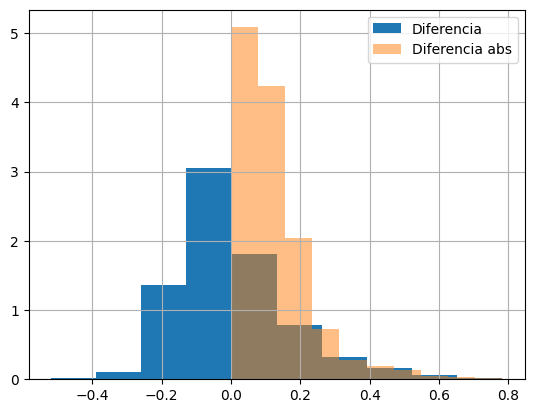

In [51]:
df_comparacion["diff"].hist(label="Diferencia",density=True)
df_comparacion["abs_diff"].hist(alpha=0.5,label="Diferencia abs",density=True)
plt.legend()
plt.show()

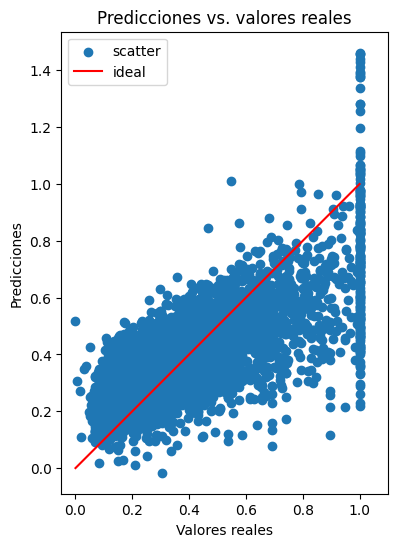

In [69]:
plt.figure(figsize=(6,6))

plt.scatter(real_array, predic_array,label="scatter")
plt.plot([0,1],[0,1],color="red",label="ideal")
plt.title("Predicciones vs. valores reales")
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.axis('square') # Set the aspect ratio to 1:1
plt.xlim(right=1.1)
plt.legend()
plt.show()

### Respuestas

1,2) En general, este modelo de regresión multilineal con una función de costo dada por el error cuadratico medio, parece ser bastante acertada a la hora de predecir nuestra variable de interes "**median_house_value**", esto se representa por el describe realizado al dataframe "df_comparación" por el plot del histograma de las diferencias entre valores reales y predichos y por la grafica real vs predicho.

3)El score es una de las muchas medidas para evaluar el desempeño de un algoritmo, en este caso empleamos un error cuadratico medio, el cual para los datos train es 0 y para los datos test nos dio muy bajo, eso nos habla de un buen desempeño en promedio de las prediciones propuestas por el modelo.

4)Se menciono a lo largo  del curso que para cada problema hay muchas soluciones, en particular basta con cambiar la función de costo para cambiar el modelo, no hay nada que nos diga que no hay un mejor modelo para los datos, en particular me pareceria interesante repetir el experimento elimininando del entrenamiento y del test los datos de las casas super lujosas, pues el dato de su precio deja de ser relevante pues se limito el precio maximo afectando la realidad de los precios aqui presentes (lo mismo sucede con las edades de las propiedades, aunque esto no afecta pues no se uso como parametro en el modelo de regresión).

5)Para este 5to se empleo a GPT-5 pues carezco de la información de que es y como implementar un pipeline:

Un pipeline sirve para automatizar el flujo completo de trabajo de un modelo, desde la preparación de los datos hasta la predicción final. Se utiliza especialmente en scikit-learn, donde el objeto `Pipeline` permite unir transformaciones y modelos en un solo flujo reproducible.

La idea es encadenar todas las etapas (carga → limpieza → ingeniería de variables → modelo → validación) en un único objeto reproducible, evaluable y desplegable.

## Estructura del pipeline

* Preprocesamiento numérico: imputación + escalado.

* Preprocesamiento categórico: imputación + One-Hot.

* Modelo: el estimador que elijas (p. ej., RandomForest/LogisticRegression/XGBoost).

* Búsqueda de hiperparámetros: GridSearchCV/RandomizedSearchCV sobre el pipeline (evita fuga de datos).

## Ejemplo completo de clasificación
```python
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import joblib

# 1) Datos
df = pd.read_csv("datos.csv")
y = df["target"]
X = df.drop(columns=["target"])

num_cols = X.select_dtypes(include=["int64","float64"]).columns
cat_cols = X.select_dtypes(include=["object","category","bool"]).columns

# 2) Preprocesamiento
num_pipe = Pipeline([
    ("imp", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_pipe = Pipeline([
    ("imp", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore"))
])

prep = ColumnTransformer([
    ("num", num_pipe, num_cols),
    ("cat", cat_pipe, cat_cols)
])

# 3) Pipeline completo
pipe = Pipeline([
    ("prep", prep),
    ("clf", RandomForestClassifier(random_state=42, n_jobs=-1))
])

# 4) Búsqueda de hiperparámetros SIN fuga de datos
param_grid = {
    "clf__n_estimators": [200, 500],
    "clf__max_depth": [None, 10, 20],
    "clf__min_samples_leaf": [1, 2, 5]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(pipe, param_grid=param_grid, cv=cv, scoring="f1", n_jobs=-1)

grid.fit(X, y)
print("Mejores params:", grid.best_params_)
print("Mejor F1:", grid.best_score_)

# 5) Evaluación hold-out (opcional si separas test)
# X_tr, X_te, y_tr, y_te = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
# grid.fit(X_tr, y_tr)
# y_hat = grid.predict(X_te)
# print(classification_report(y_te, y_hat))

# 6) Serializar para producción (persistir TODO el flujo)
joblib.dump(grid.best_estimator_, "modelo_pipeline.joblib")
```
## Inferencia
``` python
import joblib, pandas as pd
pipe = joblib.load("modelo_pipeline.joblib")
nuevos = pd.read_csv("nuevos_datos.csv")
preds = pipe.predict(nuevos)
```

## Buenas prácticas

* Evita fuga de datos: todo dentro del pipeline y valida con CV.

* Reproducibilidad: fija `random_state`, guarda el pipeline y las listas de columnas.

* Trazabilidad: versiona datos/código/modelo (p. ej., con MLflow/DVC si quieres orquestación mayor).

* Monitorización: guarda métricas y re-entrena con el mismo pipeline cuando cambie la data.
